In [1]:
import pandas as pd
import json as js
import csv
import matplotlib.pyplot as plt
import numpy as np
import math as m
import seaborn as sns

In [2]:
data = {}
tasks = ['Essay Evaluator','Task Manager', 'Map Generator']
for task in tasks:
    data[task] = pd.read_csv(task +'.csv', index_col=0)
    
    row_1 = list(data[task].loc['Total Working'])
    row_2 = list(data[task].loc['Total Working & Accurate'])

    data[task].loc['Total Working'] = row_2
    data[task].loc['Total Working & Accurate'] = row_1

    data[task] = data[task].rename(index={'Total Working': 'Total Pass', 
                                          'Total Working & Accurate': 'Total Fail'})
    data[task] = data[task][['LMQL','DSPy','MTLLM']]

data['Essay Evaluator']

,LMQL,DSPy,MTLLM
Total Pass,1,6,12
Total Fail,2,4,0
Total Not Working,12,9,7
Total No Code Submitted,5,1,1


In [3]:
for task in tasks:
    data[task].loc['Total Fail'] = data[task].loc['Total Not Working']+data[task].loc['Total Fail']+data[task].loc['Total No Code Submitted']
    data[task] = data[task].drop(['Total Not Working', 'Total No Code Submitted'])
    data[task] = (data[task]/20)*100
    data[task] = data[task].drop('Total Fail')

data['Essay Evaluator'].T

,Total Pass
LMQL,5.0
DSPy,30.0
MTLLM,60.0


In [4]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": "Times New Roman",
})

/tmp/ipykernel_1513/3555197569.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend().remove()
/tmp/ipykernel_1513/3555197569.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_1513/3555197569.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend().remove()
/tmp/ipykernel_1513/3555197569.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_1513/3555197569.py:9: UserW

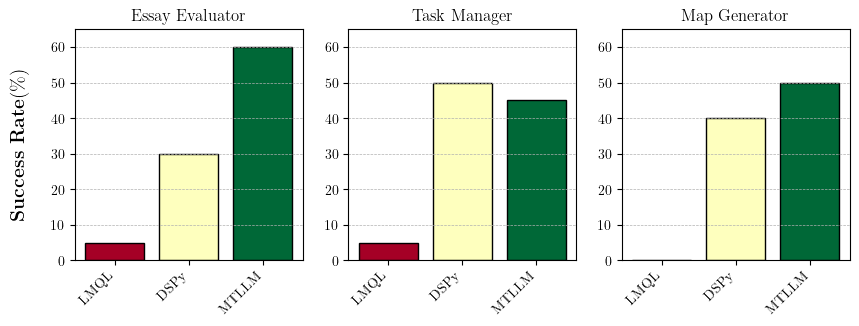

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for i,task in enumerate(data.keys()):
    df = data[task].T
    colors = plt.cm.RdYlGn(np.linspace(0, 1, len(df)))
    # data[task].T.plot(kind='bar', stacked=True, colormap='RdYlGn_r', ax=axes[i], title=task, edgecolor='black', linewidth=1.0, fontsize=14)
    bars = axes[i].bar(df.index, df['Total Pass'], color=colors, edgecolor='black', linewidth=1.0,)
    axes[i].set_title(task)
    axes[i].legend().remove()
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
    axes[i].grid(axis='y',linestyle='--', linewidth=0.5)
    axes[i].set_ylim(0,65)
    
legends = data['Essay Evaluator'].T.keys()
legends = [legend.replace('Total ', '') for legend in legends]
# fig.legend(legends, loc='upper center',shadow=True, fontsize=14, bbox_to_anchor=(0.5, 1.13), ncol=2)
# fig.text(0.5, -0.15, r'\textbf{LLM Programming Framework}', ha='center', va='center',fontsize=12)
fig.text(0.07, 0.5, r'\textbf{Success Rate}($\%$)', ha='center', va='center', rotation='vertical', fontsize=14)
plt.savefig('user_study_code_summary.png', dpi=300, bbox_inches='tight')
plt.show()




